# 1. Install Dependencies and Setup

In [ ]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\angry\-facial-expression-cartoon-vector-illustrations-isolated-on-white-background.jpg
Image not in ext list data\angry\116999ecb25ac04c42cdac0a91c578439f-29-angry-face.rsocial.w1200.jpg
Image not in ext list data\angry\17377514-close-up-image-of-a-man-with-an-angry-facial-expression-on-a-white-background.jpg
Image not in ext list data\angry\1F620.webp
Image not in ext list data\angry\5444868-very-cute-little-boy-with-angry-expression-on-face.jpg
Image not in ext list data\angry\701280_BlogMicroexpressionsPictures_Anger_050720-1-1024x683.gif
Image not in ext list data\angry\77279076.jpg
Image not in ext list data\angry\86335191-close-up-of-south-asian-indian-man-showing-angry-facial-expression.jpg
Image not in ext list data\angry\article-2654047-1EA294D500000578-700_306x423.jpg
Image not in ext list data\angry\depositphotos_251196934-stock-illustration-red-angry-face-gesture-emoji.jpg
Image not in ext list data\angry\depositphotos_80820076-Angry-face-of-a-you

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 760 files belonging to 5 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

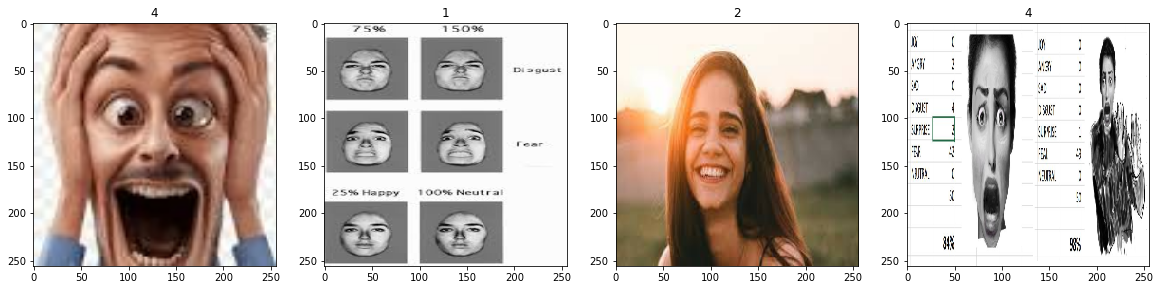

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
batch[0].max()

1.0

# 4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
batch = data.as_numpy_iterator().next()

# 5. Split Data

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [21]:
print(len(data), train_size, val_size, test_size, train_size+val_size+test_size) 

24 16 5 3 24


In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [23]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [47]:
model = Sequential()

In [48]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='sigmoid'))

In [49]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

# 7. Train

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [51]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
16/16 [==============================] - 4s 189ms/step - loss: 1.7298 - accuracy: 0.2246 - val_loss: 1.5324 - val_accuracy: 0.3063
Epoch 2/20
16/16 [==============================] - 4s 192ms/step - loss: 1.5194 - accuracy: 0.3633 - val_loss: 1.3777 - val_accuracy: 0.5250
Epoch 3/20
16/16 [==============================] - 4s 198ms/step - loss: 1.2778 - accuracy: 0.5352 - val_loss: 1.1170 - val_accuracy: 0.6500
Epoch 4/20
16/16 [==============================] - 4s 197ms/step - loss: 1.0008 - accuracy: 0.6582 - val_loss: 1.0703 - val_accuracy: 0.5437
Epoch 5/20
16/16 [==============================] - 4s 196ms/step - loss: 0.7946 - accuracy: 0.7285 - val_loss: 0.7349 - val_accuracy: 0.7875
Epoch 6/20
16/16 [==============================] - 4s 197ms/step - loss: 0.5862 - accuracy: 0.8145 - val_loss: 0.5368 - val_accuracy: 0.8313
Epoch 7/20
16/16 [==============================] - 4s 194ms/step - loss: 0.4035 - accuracy: 0.8867 - val_loss: 0.6100 - val_accuracy: 0.8000
Epoch 

# 8. Plot Performance

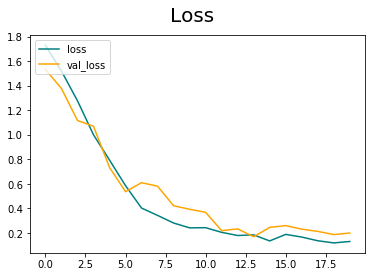

In [52]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

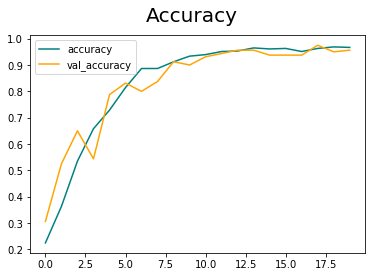

In [53]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [67]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    Y_predicted = []
    for i in range(len(yhat)):
        max = 0
        for y_p in yhat[i]:
            if(max < y_p):
                max = y_p
        Y_predicted.append(np.where(yhat[i]==max)[0][0])
    Y_predicted = np.array(Y_predicted)
#     print(y, Y_predicted)
    pre.update_state(y, Y_predicted)
    re.update_state(y, Y_predicted)
    acc.update_state(y, Y_predicted)

1/1 [==============================] - 0s 35ms/step


InvalidArgumentError: predictions must be <= 1
Condition x <= y did not hold.
First 3 elements of x:
[1. 4. 4.]
First 1 elements of y:
[1.]

In [ ]:
print(pre.result(), re.result(), acc.result())

# 10. Test

In [ ]:
import cv2

In [ ]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

# 11. Save the Model

In [68]:
from tensorflow.keras.models import load_model

In [69]:
model.save(os.path.join('models','fiveImageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))